In [159]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import seaborn as sns

In [139]:
df = pd.read_csv(filepath_or_buffer=r'datasets\redict Students Dropout and Academic Success.csv',delimiter=";")

In [140]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [142]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<Axes: xlabel='Marital status', ylabel='Count'>

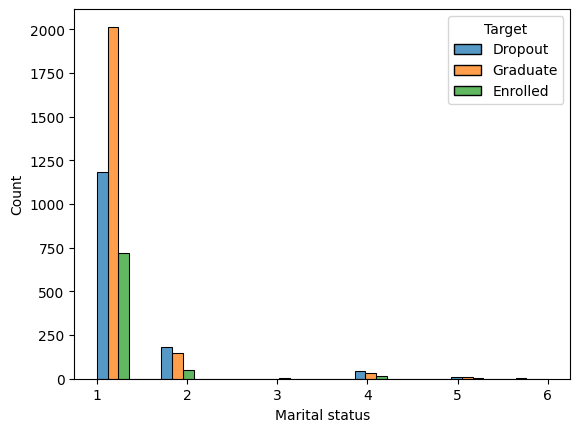

In [143]:
sns.histplot(data=df,x="Marital status",hue='Target',multiple="dodge")

c:\Users\willi\miniconda3\envs\icd\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


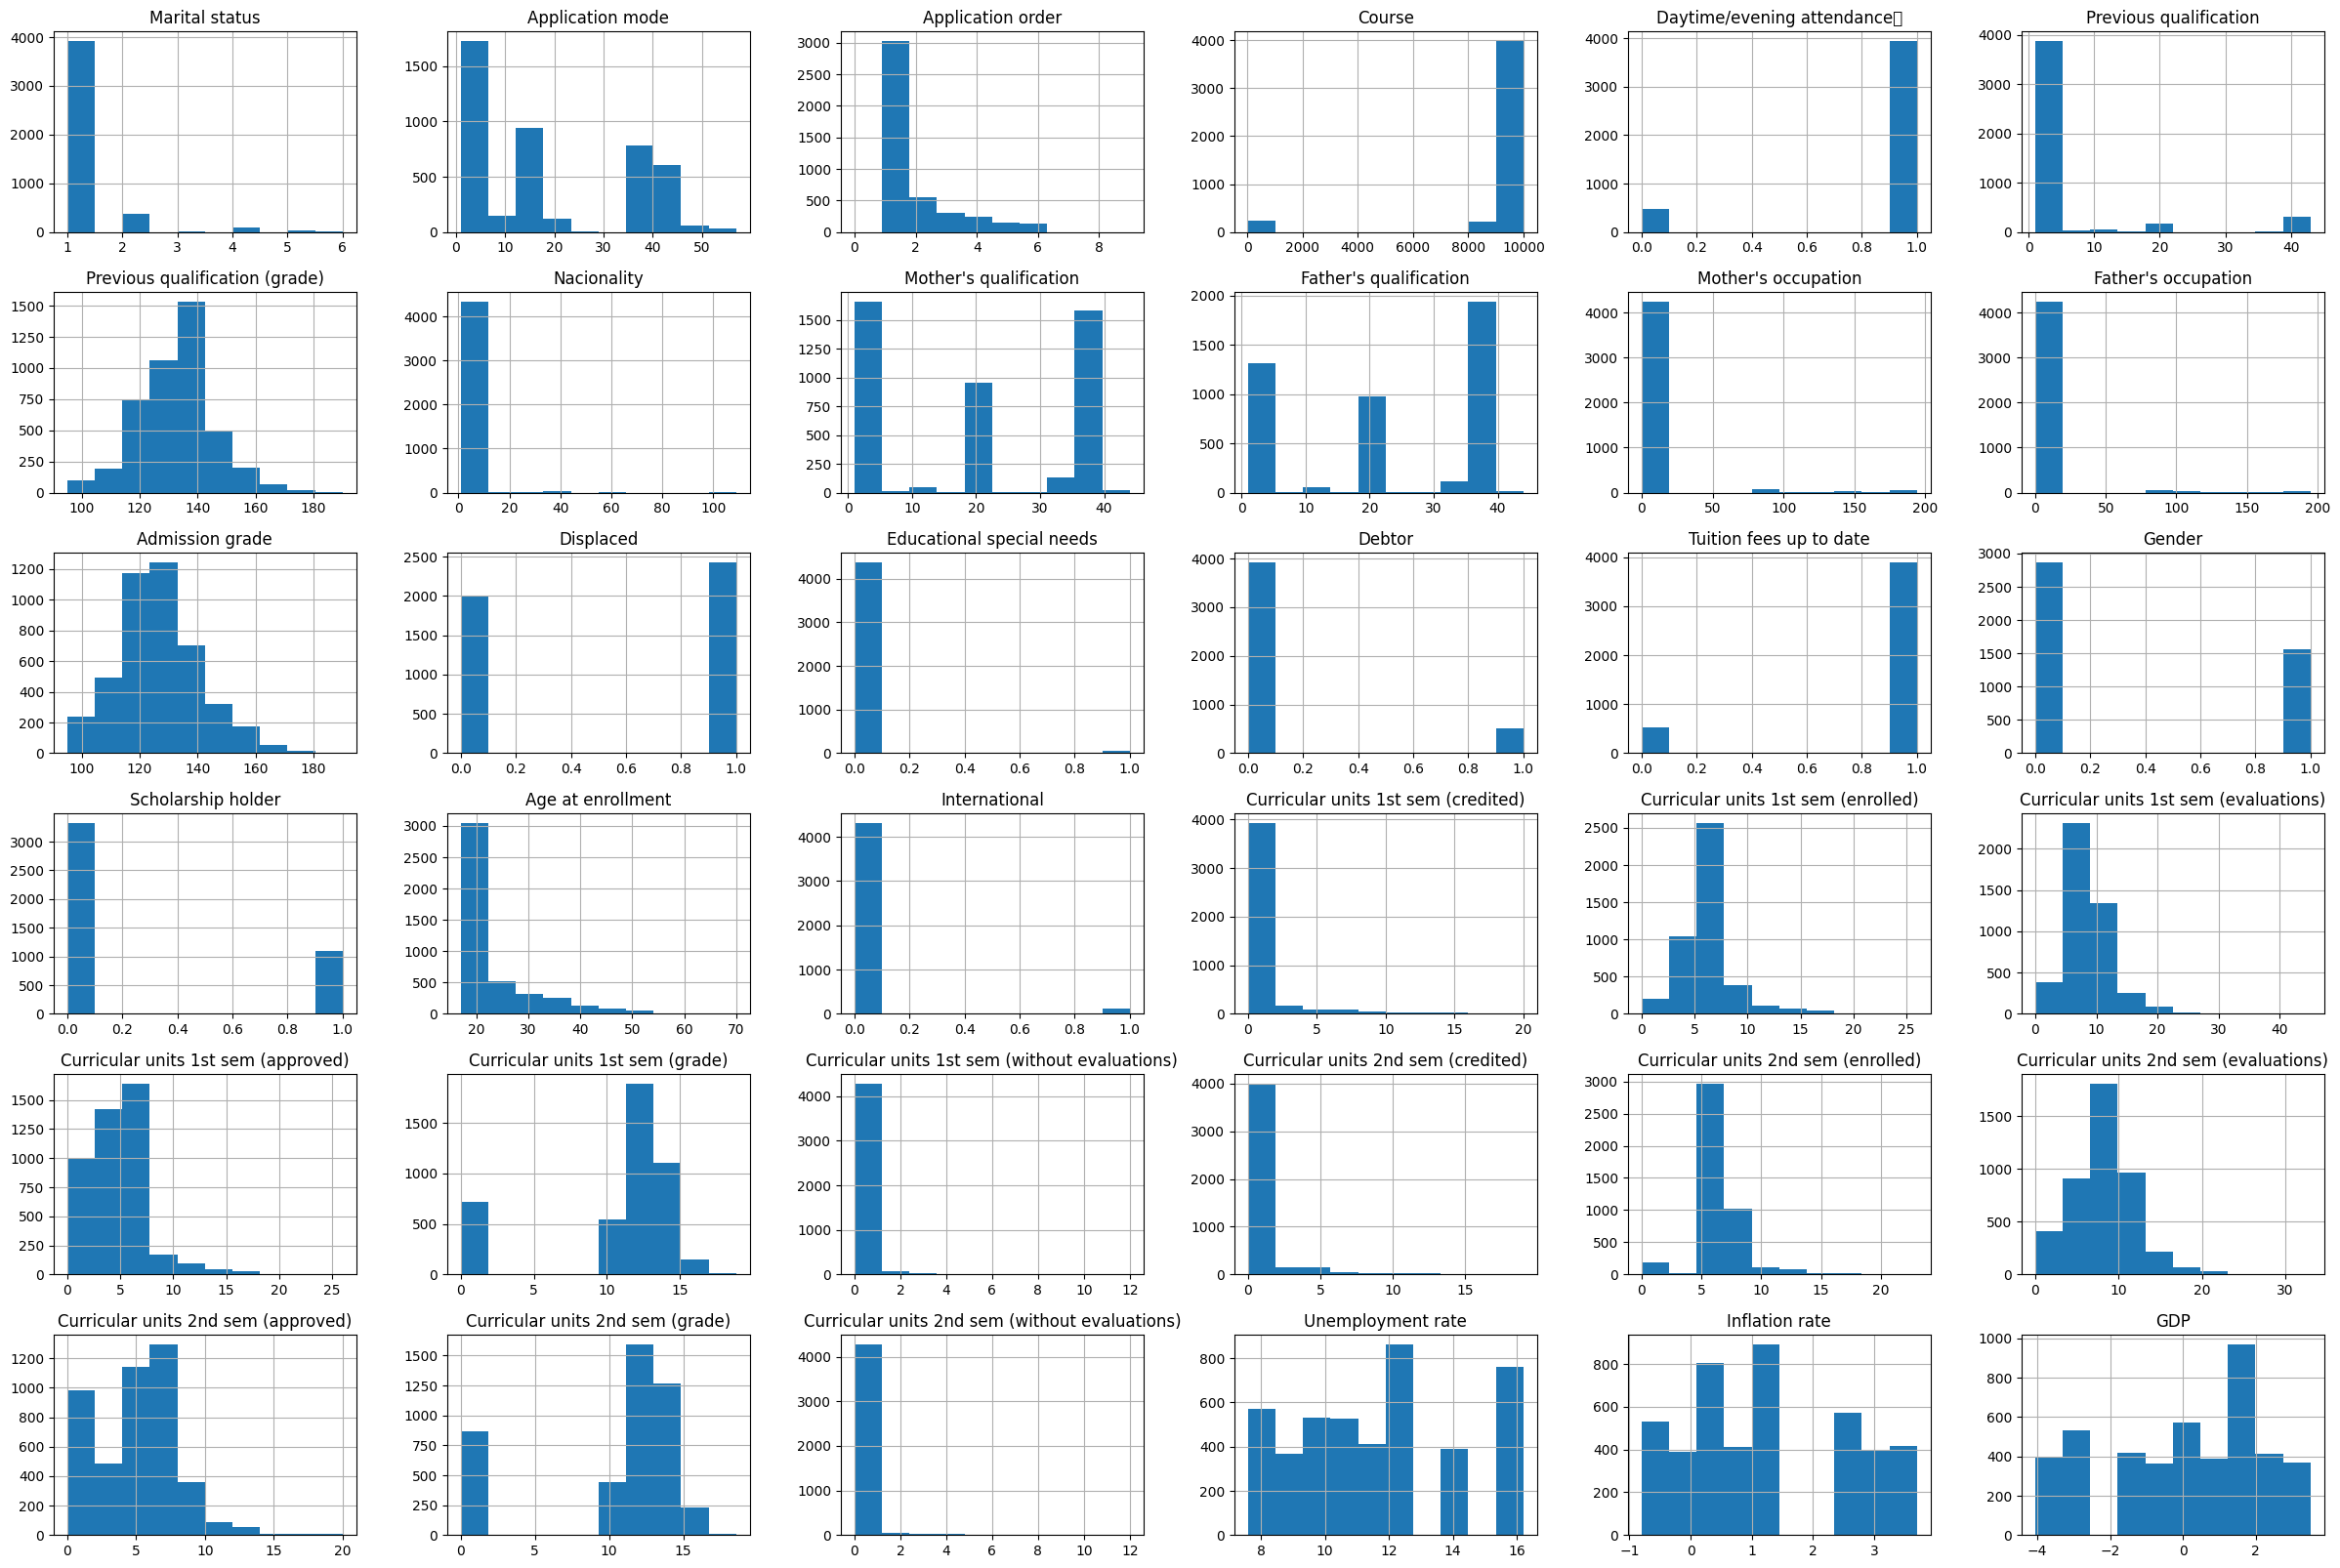

In [144]:
df.hist(figsize=(30,20))
plt.show()

In [145]:
le = LabelEncoder()
df['Course'] = le.fit_transform(df['Course'])

In [158]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,1,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,10,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,4,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,14,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,2,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [146]:
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Only the last column

scaler = StandardScaler()
# standart_x = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
# x_train_standart, y_train, x_test_standart, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)



# x_train_standart, x_test, y_train, y_test_standart = train_test_split(scaler.fit_transform(X),y,test_size=0.2,random_state=1234)

In [147]:
x_standart = scaler.fit_transform(X=X)
x_train_standart, x_test_standart, _, _ = train_test_split(x_standart,y,test_size=0.2,random_state=1234)

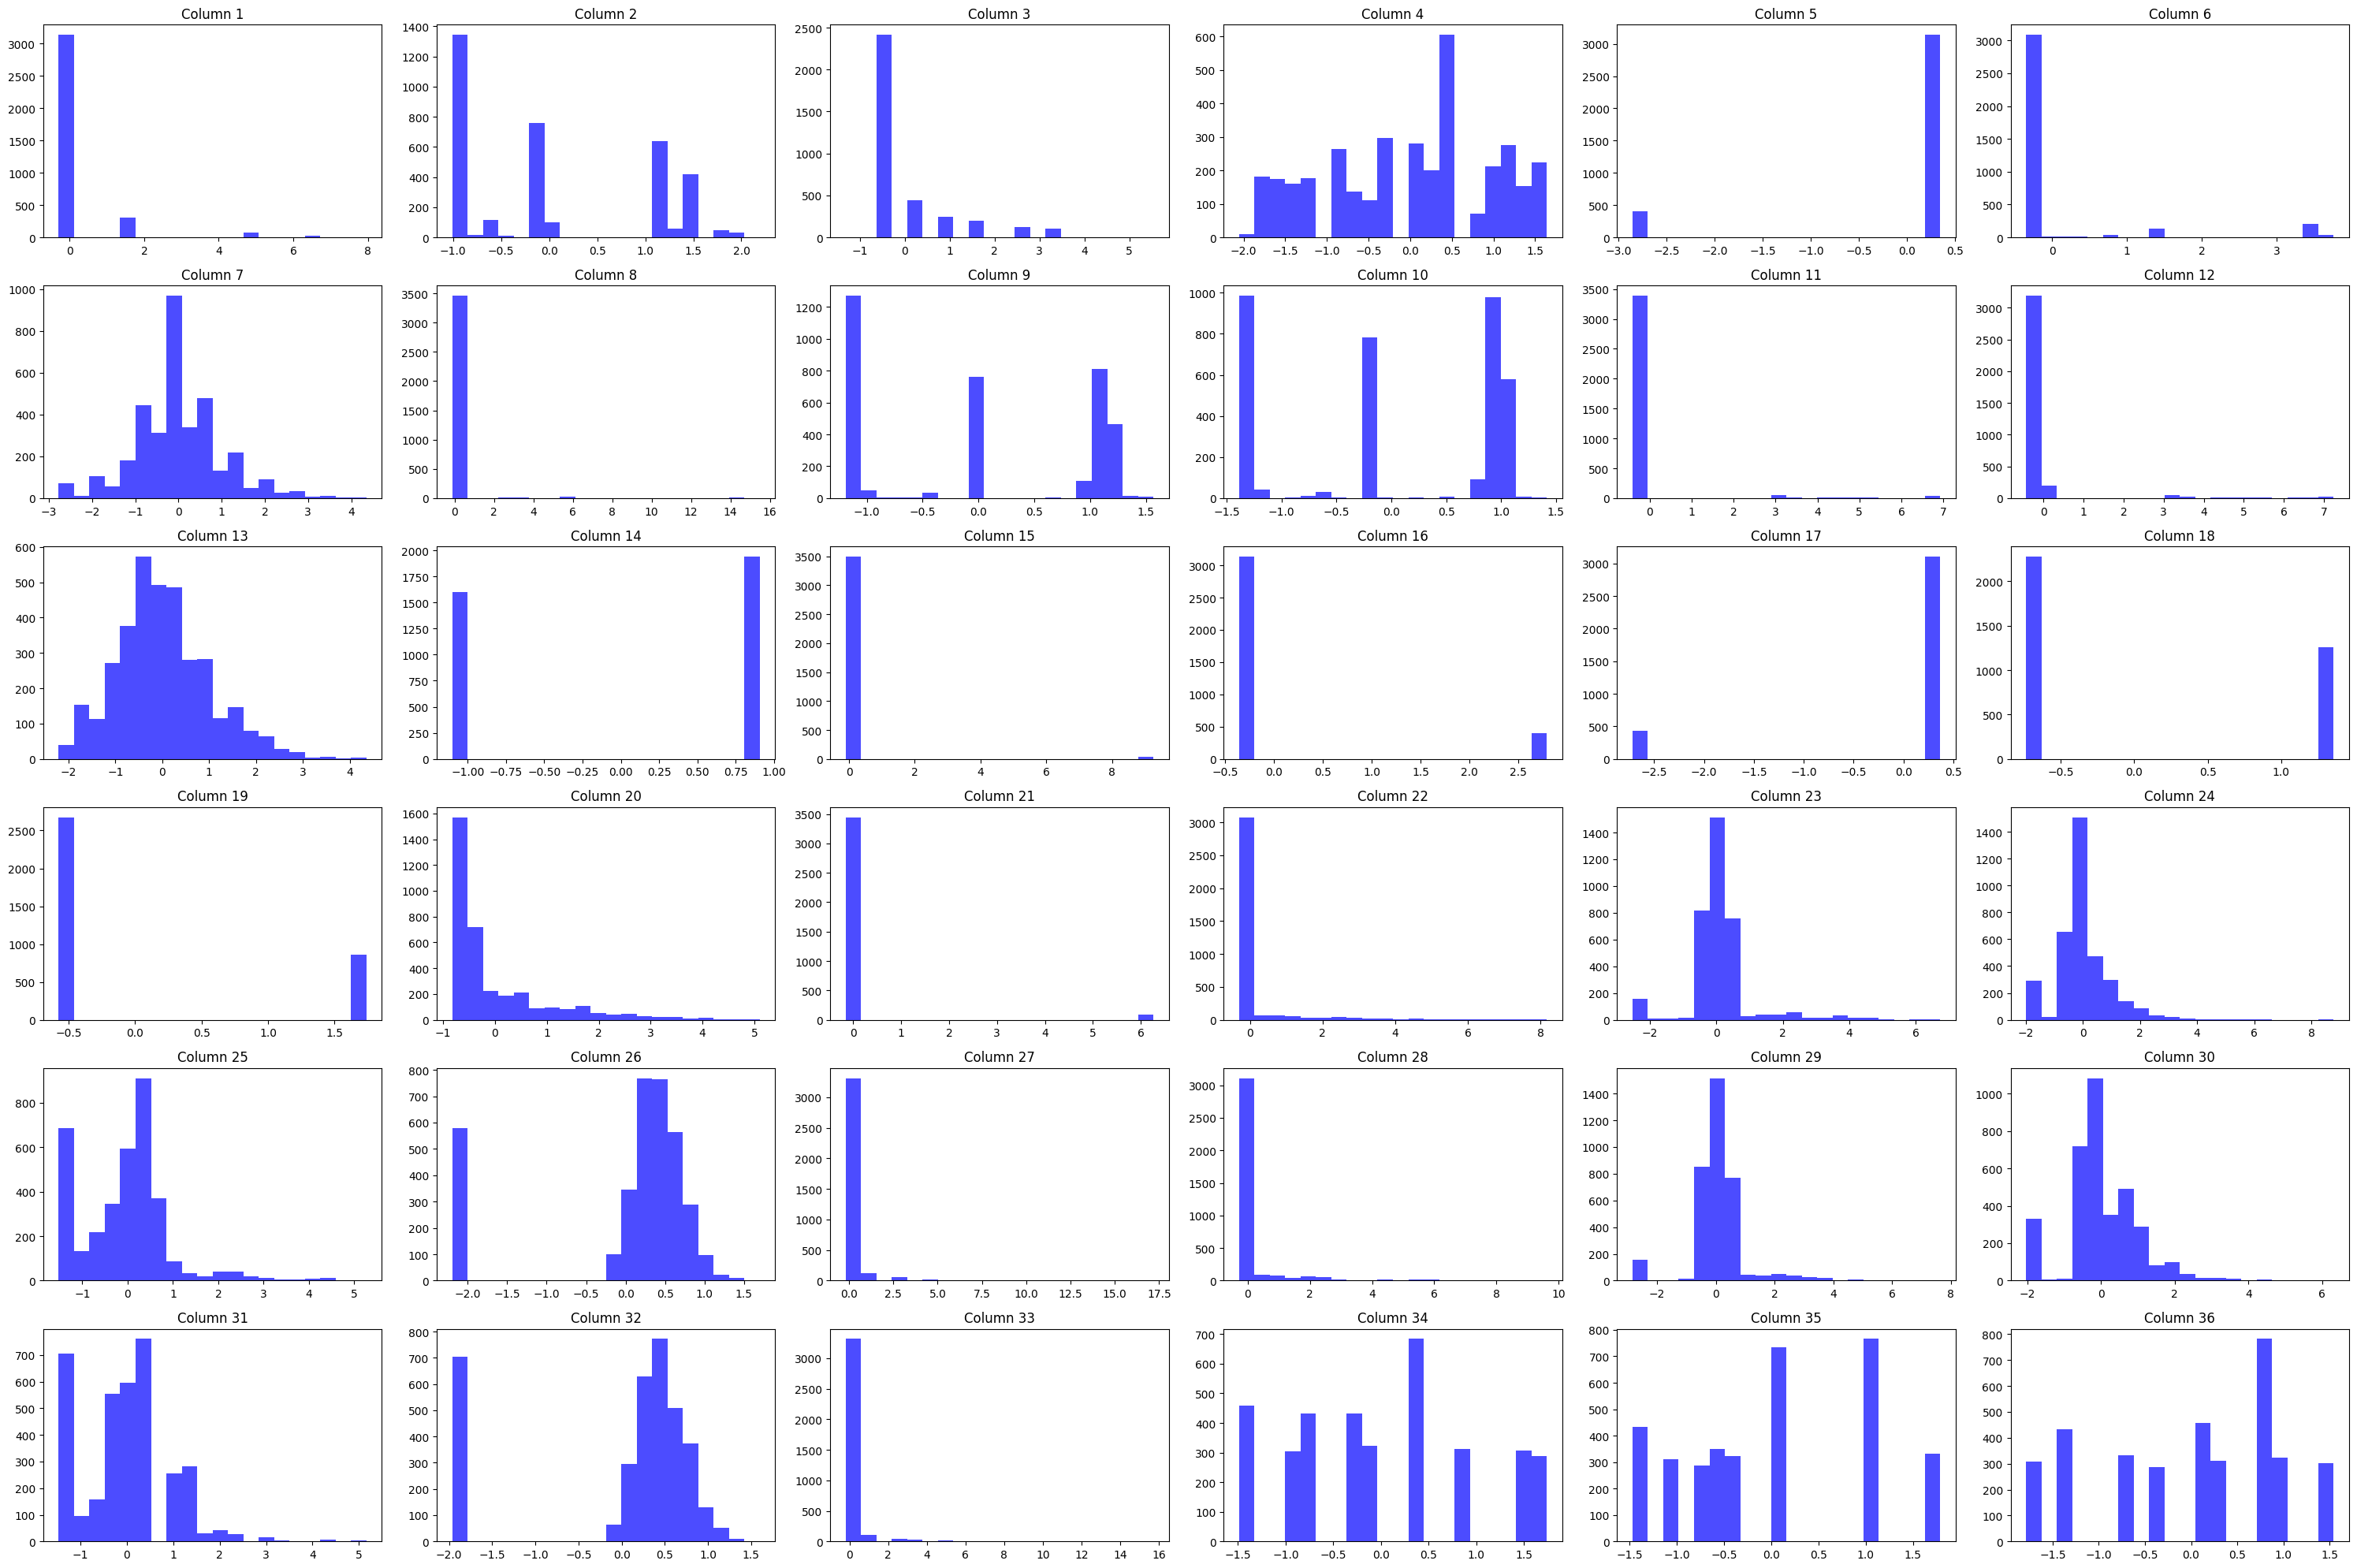

In [148]:
# display(x_train_standart)
# Number of columns
num_columns = x_train_standart.shape[1]

# Create subplots for all columns
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 20))  # Adjust rows/cols as needed
axes = axes.flatten()  # Flatten for easy iteration

# Generate histogram for each column
for i in range(num_columns):
    axes[i].hist(x_train_standart[:, i], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(f'Column {i+1}')

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [160]:
lr = LogisticRegression(random_state=1234,max_iter=10000)
lrs = LogisticRegression(random_state=1234,max_iter=10000)

In [161]:
lr.fit(X=x_train,y=y_train)

LogisticRegression(max_iter=10000, random_state=1234)

In [162]:
lrs.fit(X=x_train_standart,y=y_train)

LogisticRegression(max_iter=10000, random_state=1234)

In [163]:
y_predict = lr.predict(x_test)

In [164]:
y_predict_standart = lrs.predict(X=x_test_standart)

In [165]:
display(y_predict[:10:])

array(['Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate'],
      dtype=object)

In [166]:
display(y_predict_standart[:10:])


array(['Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate'],
      dtype=object)

'76.94915254237287%'

<Axes: >

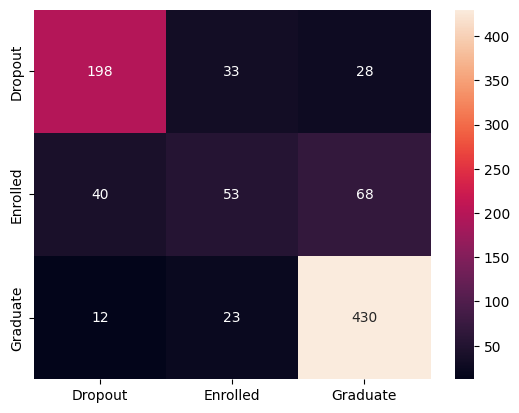

In [167]:
display(f"{accuracy_score(y_true=y_test,y_pred=y_predict)*100}%")
# display()
cm=confusion_matrix(y_true=y_test,y_pred=y_predict)
labels = sorted(df['Target'].unique())
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm_df,annot=True,fmt="d")

In [168]:
display(y_test.value_counts())
display(f"{accuracy_score(y_true=y_test,y_pred=y_predict_standart)*100}%")
display(confusion_matrix(y_true=y_test,y_pred=y_predict_standart))


Target
Graduate    465
Dropout     259
Enrolled    161
Name: count, dtype: int64

'77.06214689265536%'

array([[198,  32,  29],
       [ 40,  53,  68],
       [ 12,  22, 431]])

In [182]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=1234)
tree_model_std = DecisionTreeClassifier(max_depth=5, random_state=1234)
tree_model.fit(x_train, y_train)
tree_model_std.fit(x_train_standart,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [183]:
y_pred = tree_model.predict(x_test)
y_pred_std = tree_model_std.predict(x_test_standart)

In [184]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_std = accuracy_score(y_test, y_pred_std)
display(accuracy)
display(accuracy_std)

0.7593220338983051

0.7593220338983051

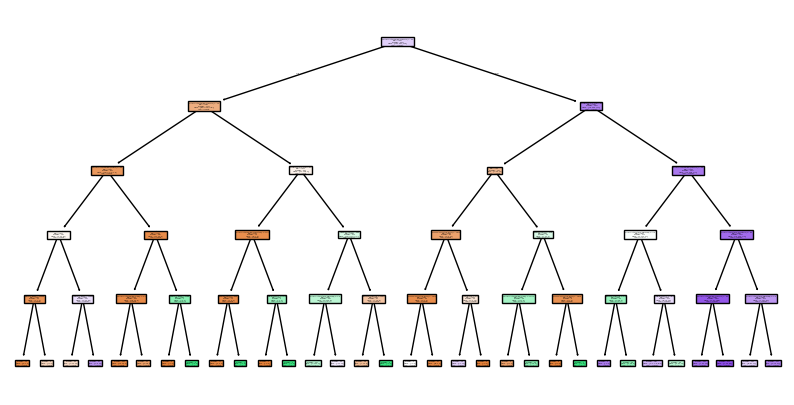

In [186]:
plt.figure(figsize=(10, 5))

# plot_tree(tree_model)
plot_tree(tree_model, feature_names=X.columns, class_names=labels, filled=True)
# plt.show()
plt.savefig("plot.pdf", format="pdf", bbox_inches="tight")
